In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
df=pd.read_csv('G:\\ML\\seattle-weather\\seattle-weather.csv')

In [3]:
warnings.filterwarnings('ignore')

# Exploratory Data Analysis(EDA)

In [4]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
df.shape

(1461, 6)

In [8]:
df['date']=pd.to_datetime(df.date)

In [9]:
df['year']=pd.DatetimeIndex(df.date).year
df['month']=pd.DatetimeIndex(df.date).month
df['day']=pd.DatetimeIndex(df.date).day

In [10]:
df=df.drop('date',axis=1)
df.head(15)

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,10.9,10.6,2.8,4.5,rain,2012,1,2
2,0.8,11.7,7.2,2.3,rain,2012,1,3
3,20.3,12.2,5.6,4.7,rain,2012,1,4
4,1.3,8.9,2.8,6.1,rain,2012,1,5
5,2.5,4.4,2.2,2.2,rain,2012,1,6
6,0.0,7.2,2.8,2.3,rain,2012,1,7
7,0.0,10.0,2.8,2.0,sun,2012,1,8
8,4.3,9.4,5.0,3.4,rain,2012,1,9
9,1.0,6.1,0.6,3.4,rain,2012,1,10


In [11]:
df.isna().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
year             0
month            0
day              0
dtype: int64

# correlation between features in data

<AxesSubplot:>

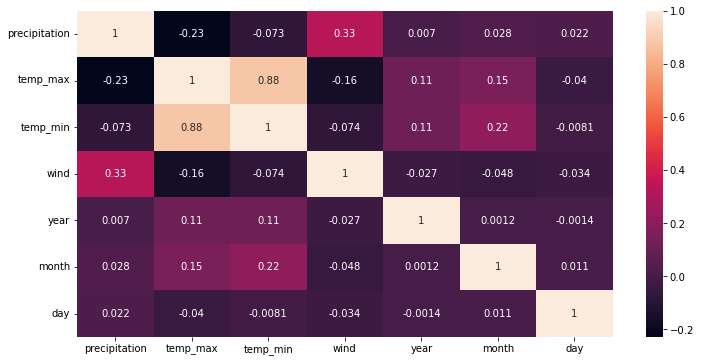

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

# the prevalent weather in data

<AxesSubplot:ylabel='weather'>

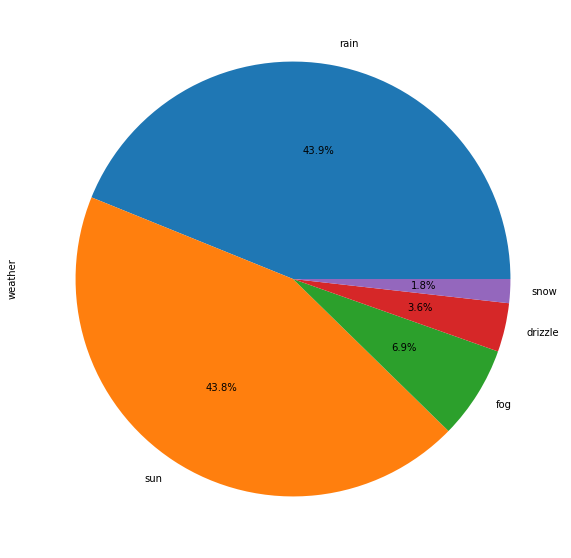

In [13]:
plt.figure(figsize=(12,10))
df['weather'].value_counts().plot.pie(autopct='%1.1f%%')

# detection of outliers in data

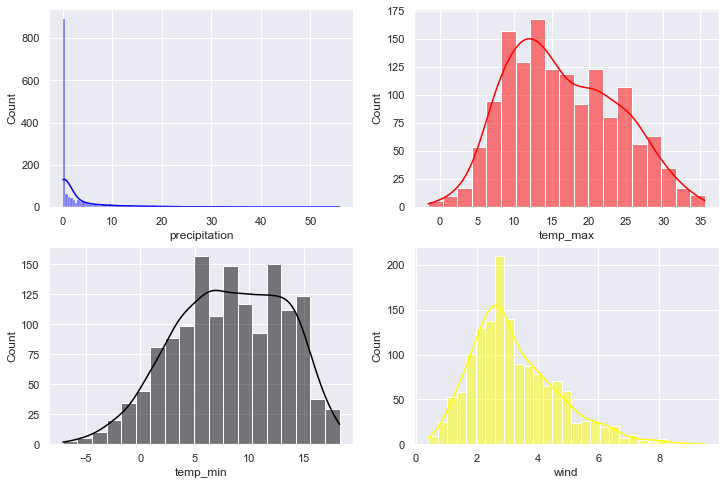

In [14]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
data=['precipitation','temp_max','temp_min','wind']
colors=['blue','red','black','yellow']
subplots=[1,2,3,4]
for i,j,n in zip (data,colors,subplots):
    plt.subplot(2,2,n)
    sns.histplot(data=df,x=i,kde=True,color=j)

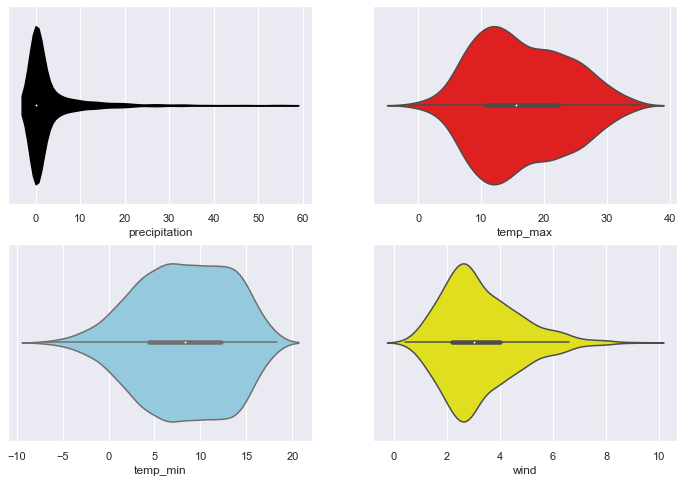

In [15]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
data=['precipitation','temp_max','temp_min','wind']
colors=['black','red','skyblue','yellow']
subplots=[1,2,3,4]
for i,j,n in zip (data,colors,subplots):
    plt.subplot(2,2,n)
    sns.violinplot(data=df,x=i,color=j)

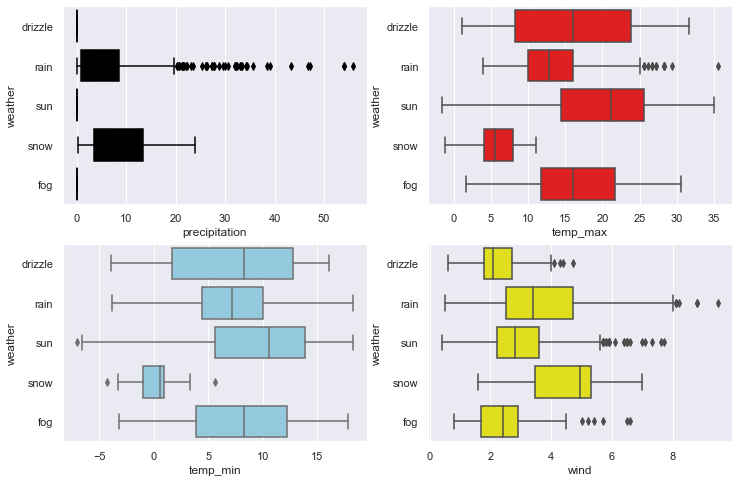

In [16]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
data=['precipitation','temp_max','temp_min','wind']
colors=['black','red','skyblue','yellow']
subplots=[1,2,3,4]
for i,j,n in zip (data,colors,subplots):
    plt.subplot(2,2,n)
    sns.boxplot(data=df,x=i,y='weather',color=j)

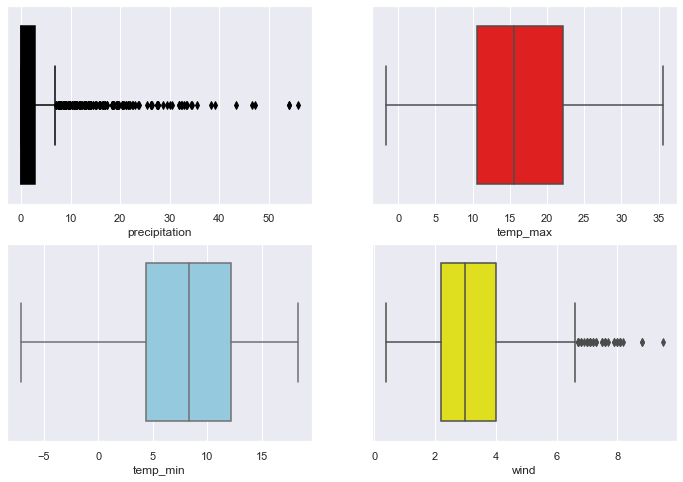

In [17]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
data=['precipitation','temp_max','temp_min','wind']
colors=['black','red','skyblue','yellow']
subplots=[1,2,3,4]
for i,j,n in zip (data,colors,subplots):
    plt.subplot(2,2,n)
    sns.boxplot(data=df,x=i,color=j)

temp_min relative to temp_max

<AxesSubplot:title={'center':'temp_min relative to temp_max'}, xlabel='temp_max', ylabel='temp_min'>

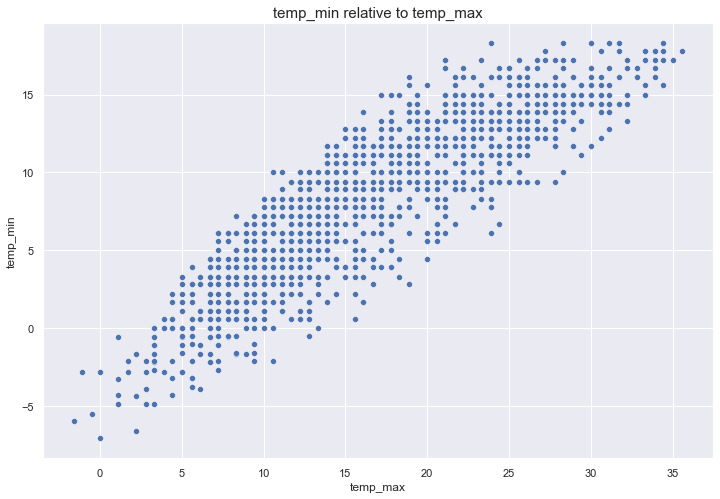

In [18]:
plt.figure(figsize=(12,8))
plt.title('temp_min relative to temp_max',fontsize=15)
sns.scatterplot(data=df,x='temp_max',y='temp_min')

temp_min relative to wind

<AxesSubplot:title={'center':'temp_min relative to wind'}, xlabel='wind', ylabel='temp_min'>

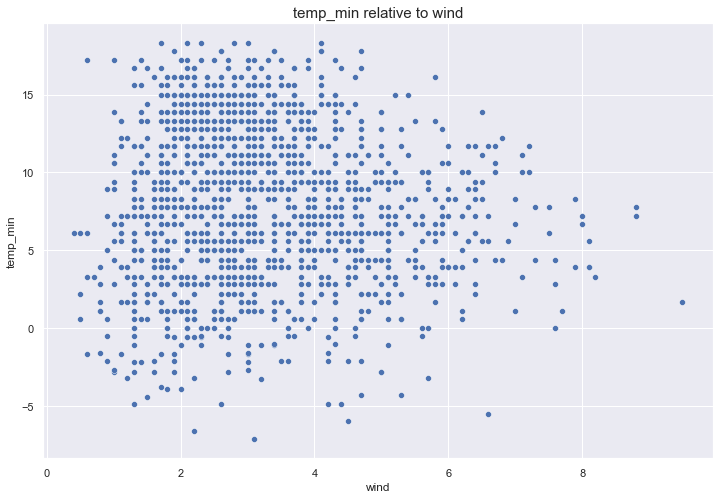

In [19]:
plt.figure(figsize=(12,8))
plt.title('temp_min relative to wind',fontsize=15)
sns.scatterplot(data=df,x='wind',y='temp_min')

mp_max relative to wind

<AxesSubplot:title={'center':'temp_max relative to wind'}, xlabel='wind', ylabel='temp_max'>

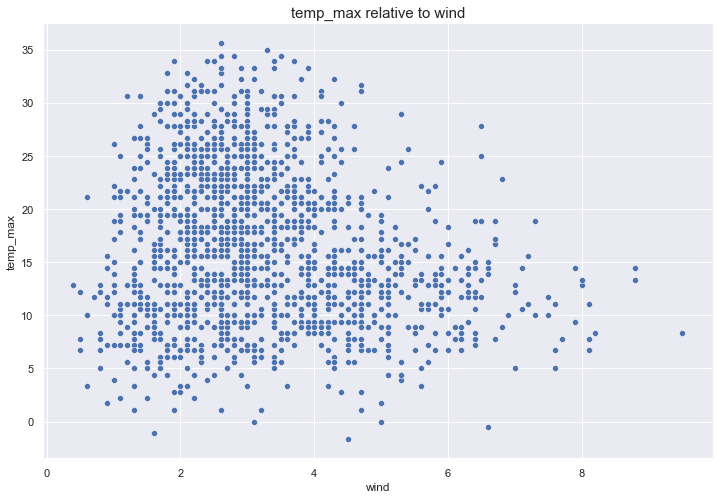

In [20]:
plt.figure(figsize=(12,8))
plt.title('temp_max relative to wind',fontsize=15)
sns.scatterplot(data=df,x='wind',y='temp_max')

precipitation relative to wind

<AxesSubplot:title={'center':'precipitation relative to wind'}, xlabel='wind', ylabel='precipitation'>

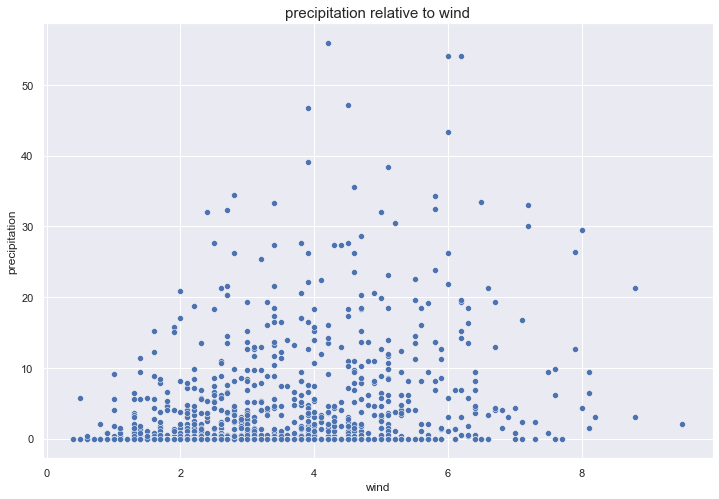

In [21]:
plt.figure(figsize=(12,8))
plt.title('precipitation relative to wind',fontsize=15)
sns.scatterplot(data=df,x='wind',y='precipitation')

# Prevalent weather for each year


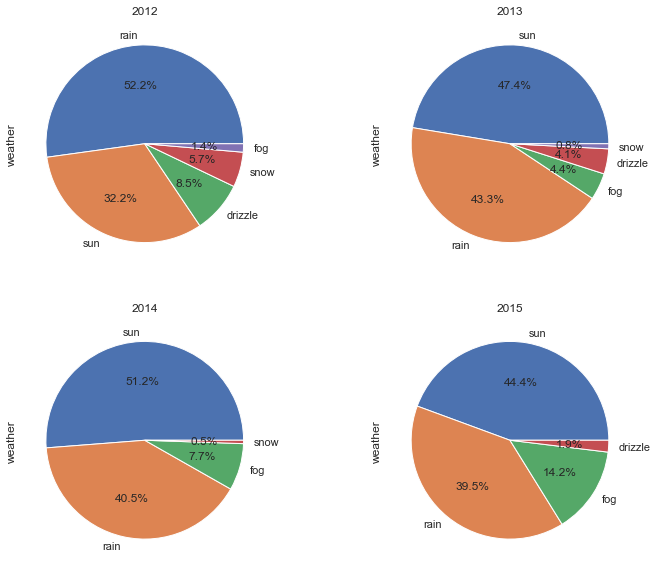

In [22]:
plt.figure(figsize=(12,10))
data=[2012,2013,2014,2015]
subplots=[1,2,3,4]
label=['snow','drizzle','sun','rain','fog']
for i,j,n in zip (data,subplots,label):
    plt.subplot(2,2,j)
    plt.title(f'{i}')
    df[df['year']==i].weather.value_counts().plot.pie(autopct='%1.1f%%')

# removing outliers

In [23]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [24]:
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)

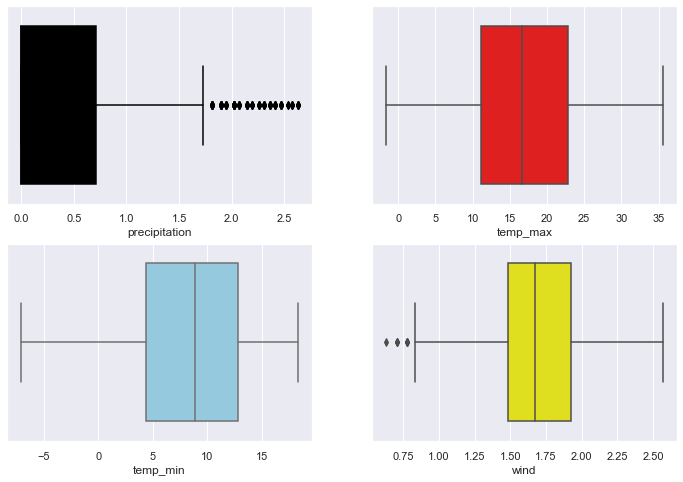

In [25]:
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
data=['precipitation','temp_max','temp_min','wind']
colors=['black','red','skyblue','yellow']
subplots=[1,2,3,4]
for i,j,n in zip (data,colors,subplots):
    plt.subplot(2,2,n)
    sns.boxplot(data=df,x=i,color=j)

# ML

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,scale, RobustScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score,roc_curve, classification_report,mean_squared_error,f1_score,recall_score,precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier,BaseEnsemble,GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import time

replace values in 'wither' with dummy values

In [27]:
##we can use this code to convert to dummy variable
## lc=LabelEncoder()
## df["weather"]=lc.fit_transform(df["weather"])

In [28]:
df['weather']=[0 if item=='drizzle' 
              else 1 if item=='rain'
              else 2 if item=='sun'
              else 3 if item=='snow'
              else 4 for item in df['weather']]

In [29]:
df.weather.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [30]:
df.head(10)

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.000000,12.8,5.0,2.167948,0,2012,1,1
2,0.894427,11.7,7.2,1.516575,1,2012,1,3
4,1.140175,8.9,2.8,2.469818,1,2012,1,5
5,1.581139,4.4,2.2,1.483240,1,2012,1,6
6,0.000000,7.2,2.8,1.516575,1,2012,1,7
7,0.000000,10.0,2.8,1.414214,2,2012,1,8
8,2.073644,9.4,5.0,1.843909,1,2012,1,9
9,1.000000,6.1,0.6,1.843909,1,2012,1,10
10,0.000000,6.1,-1.1,2.258318,2,2012,1,11
11,0.000000,6.1,-1.7,1.378405,2,2012,1,12


# creat train & test set

In [31]:
x=df.drop(['weather','year','month','day'],axis=1)
y=df['weather']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [33]:
print('x_train_shape: ',x_train.shape)
print('x_test_shape: ',x_test.shape)
print('y_train_shape: ',y_train.shape)
print('y_test_shape: ',y_test.shape)

x_train_shape:  (1109, 4)
x_test_shape:  (124, 4)
y_train_shape:  (1109,)
y_test_shape:  (124,)


# Models

# Logistic Regression

In [34]:
## Now we will tune our model with GridSearch.

lg_params ={"penalty":["l1", "l2", "elasticnet", "none"],
            "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
             "C": list(range(10))}

In [35]:
log_reg=LogisticRegression()
log_reg_cv=GridSearchCV(log_reg,lg_params,cv=10)
log_reg_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [36]:
#best score
log_reg_cv.best_score_

0.8286977886977887

In [37]:
#best parameters
log_reg_cv.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [38]:
logreg_tuned =LogisticRegression(C= 1, penalty= "l2", solver= "newton-cg").fit(x_train,y_train)
logreg_tuned.fit(x_train,y_train)

LogisticRegression(C=1, solver='newton-cg')

In [39]:
log_accuracy = cross_val_score(logreg_tuned, x_test, y_test, cv=10)
print("Average Accuracy: {:.2f} %".format(log_accuracy.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(log_accuracy.std()*100))

Average Accuracy: 84.62 %
Standart Deviation of Accuracies: 8.62 %


# Prediction

In [40]:
sns.set(style="darkgrid")


In [41]:
## her we draw precesion-recall & ROC curves but i can't now becouse 'y' not binary 

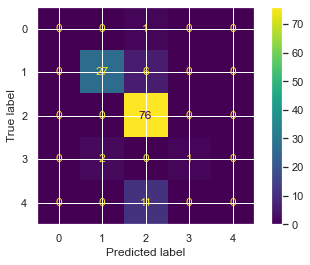

In [42]:
y_test_pred=logreg_tuned.predict(x_test)
cm=confusion_matrix(y_test,y_test_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [43]:
accuracy_score(y_test,y_test_pred)

0.8387096774193549

In [44]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.93      0.82      0.87        33
           2       0.81      1.00      0.89        76
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00        11

    accuracy                           0.84       124
   macro avg       0.55      0.43      0.45       124
weighted avg       0.77      0.84      0.79       124



# K-NEAREST NEIGHBOR CLASSIFIER:



In [45]:
KNN_params={'weights':['uniform','distance','callable'],
           'algorithm':['auto','ball_tree','kd_tree','brute'],
           'metric':['str','callable','minkowski'],
           'p':[1,2],
           'n_neighbors':list(range(5))}

In [46]:
knn_clf=KNeighborsClassifier()
knn_clf_cv=GridSearchCV(knn_clf,KNN_params,cv=10)
knn_clf_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['str', 'callable', 'minkowski'],
                         'n_neighbors': [0, 1, 2, 3, 4], 'p': [1, 2],
                         'weights': ['uniform', 'distance', 'callable']})

In [47]:
#best score
knn_clf_cv.best_score_

0.7628337428337428

In [48]:
#best parameters
knn_clf_cv.best_params_

{'algorithm': 'auto',
 'metric': 'minkowski',
 'n_neighbors': 4,
 'p': 1,
 'weights': 'uniform'}

In [49]:
knn_tuned =KNeighborsClassifier(algorithm='auto',metric="minkowski",n_neighbors= 4,
                                 p=1,weights='uniform').fit(x_train,y_train)
knn_tuned.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4, p=1)

In [50]:
knn_accuracy = cross_val_score(knn_tuned, x_test, y_test, cv=10)
print("Average Accuracy: {:.2f} %".format(knn_accuracy.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(knn_accuracy.std()*100))

Average Accuracy: 75.71 %
Standart Deviation of Accuracies: 11.38 %


# Prediction

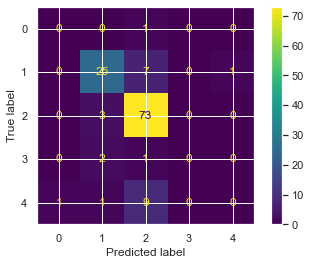

In [51]:
y_test_pred=knn_tuned.predict(x_test)
cm=confusion_matrix(y_test,y_test_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [52]:
accuracy_score(y_test,y_test_pred)

0.7903225806451613

In [53]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.81      0.76      0.78        33
           2       0.80      0.96      0.87        76
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        11

    accuracy                           0.79       124
   macro avg       0.32      0.34      0.33       124
weighted avg       0.71      0.79      0.74       124



# GradientBoostingClassifier

In [54]:
Gradient_params={'loss':['log_loss','deviance','exponential'],
                 'learning_rate':[0.2,0.4,0.6],
                'criterion':['friedman_mse','squared_error','mse']}

In [55]:
Gradient_clf=GradientBoostingClassifier()
Gradient_clf_cv=GridSearchCV(Gradient_clf,Gradient_params,cv=10)
Gradient_clf_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.2, 0.4, 0.6],
                         'loss': ['log_loss', 'deviance', 'exponential']})

In [56]:
#best score
Gradient_clf_cv.best_score_

0.7917117117117117

In [57]:
#best parameters
Gradient_clf_cv.best_params_

{'criterion': 'mse', 'learning_rate': 0.2, 'loss': 'deviance'}

In [58]:
Gradient_tuned =GradientBoostingClassifier(criterion='squared_error',loss="deviance",learning_rate= 0.4)
Gradient_tuned.fit(x_train,y_train)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.4)

In [59]:
Gradient_accuracy = cross_val_score(Gradient_tuned, x_test, y_test, cv=10)
print("Average Accuracy: {:.2f} %".format(Gradient_accuracy.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(Gradient_accuracy.std()*100))

Average Accuracy: 73.14 %
Standart Deviation of Accuracies: 13.38 %


# Prediction

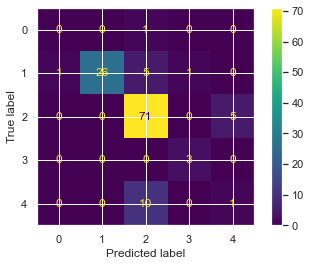

In [60]:
y_test_pred=Gradient_tuned.predict(x_test)
cm=confusion_matrix(y_test,y_test_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [61]:
accuracy_score(y_test,y_test_pred)

0.8145161290322581

In [62]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.79      0.88        33
           2       0.82      0.93      0.87        76
           3       0.75      1.00      0.86         3
           4       0.17      0.09      0.12        11

    accuracy                           0.81       124
   macro avg       0.55      0.56      0.55       124
weighted avg       0.80      0.81      0.80       124



# CHECKING FOR THE USER INPUT

In [63]:
input=[[0,0,0,0]]
ot=logreg_tuned.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("rain")
elif(ot==2):
    print("sun")
elif(ot==3):
    print("snow")
else:
    print("fog")

The weather is:
fog
